In [153]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from pandas_datareader import data as pdr
import statistics

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [187]:
quandl.ApiConfig.api_key = "KsxPyvdx37U7pYk3xHBy"

data = pdr.get_data_yahoo("AMZN", start="2017-01-28", end="2018-04-26")
df_unmod = data
df = data.head(-22)

print(df)

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2017-01-30  41.674999  40.819000  41.650002  41.519001   74946000  41.519001
2017-01-31  41.349499  40.978001  41.187500  41.174000   62744000  41.174000
2017-02-01  41.688999  41.247002  41.460499  41.617500   77004000  41.617500
2017-02-02  42.124500  41.412998  41.829498  41.997501  147010000  41.997501
2017-02-03  40.915001  40.200001  40.335999  40.509998  217376000  40.509998
...               ...        ...        ...        ...        ...        ...
2018-03-20  79.349998  77.270500  77.516998  79.325500   91632000  79.325500
2018-03-21  79.500000  78.158501  79.322502  79.093002   95016000  79.093002
2018-03-22  78.692497  77.120003  78.273499  77.246002  126412000  77.246002
2018-03-23  77.450996  74.767998  76.950500  74.778000  160120000  74.778000
2018-03-26  77.849503  74.962502  76.500000  77.792999  112494000  77.792999

In [167]:
df = df[['Adj Close']]
df

,Adj Close
Date,
2017-01-30,41.519001
2017-01-31,41.174000
2017-02-01,41.617500
2017-02-02,41.997501
2017-02-03,40.509998
...,...
2018-03-20,79.325500
2018-03-21,79.093002
2018-03-22,77.246002


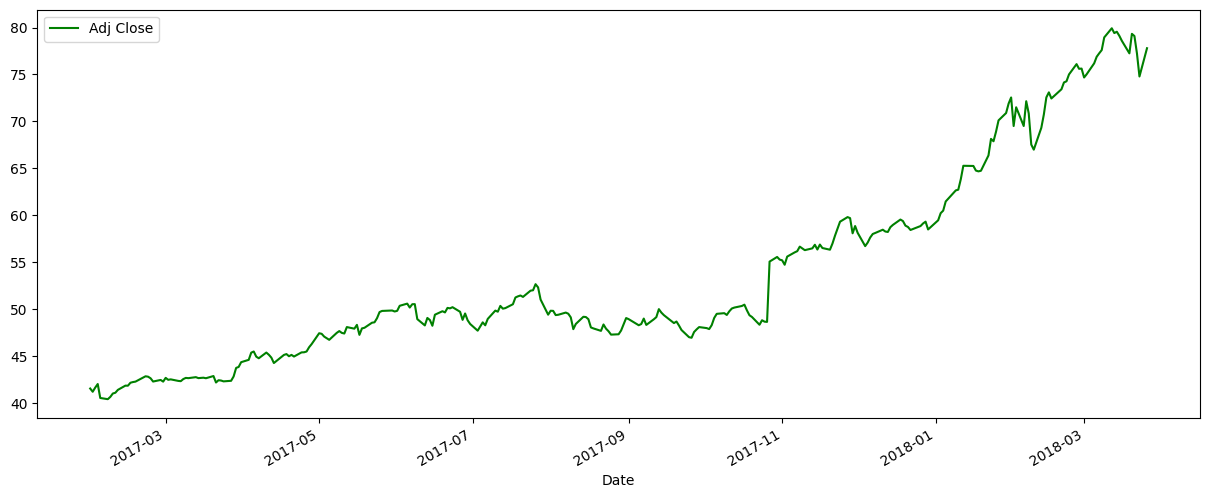

In [168]:
df['Adj Close'].plot(figsize=(15,6), color='g')
plt.legend(loc="upper left")
plt.show()

In [170]:
forecast = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast)
df.head()

C:\Users\Liamo Pennimpede\AppData\Local\Temp\ipykernel_23056\1880958611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-forecast)


,Adj Close,Prediction
Date,,
2017-01-30,41.519001,42.626499
2017-01-31,41.174000,42.648499
2017-02-01,41.617500,42.671001
2017-02-02,41.997501,42.615501
2017-02-03,40.509998,42.848499


In [171]:
X = np.array(df.drop(["Prediction"], 1))
X = preprocessing.scale(X) #standardizes data (mu = 0, sigma = 1)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df["Prediction"])
y = y[:-forecast]


C:\Users\Liamo Pennimpede\AppData\Local\Temp\ipykernel_23056\3583692209.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["Prediction"], 1))


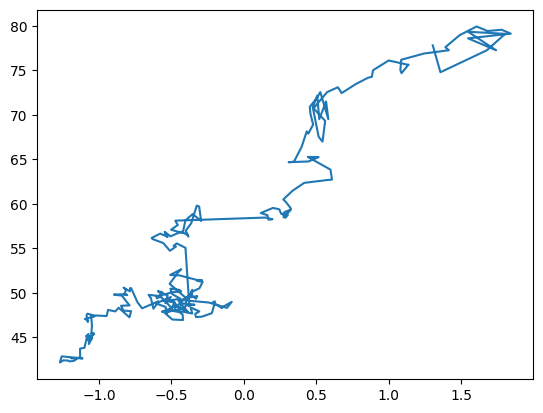

In [172]:
plt.plot(X,y)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = LinearRegression() #estimator instance, classifier
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test) #check accuracy of model
confidence

0.8541904271067905

In [174]:
forecast_predicted = clf.predict(X_forecast)
forecast_predicted #predicted values of last 30 days

array([78.52284773, 80.33629322, 82.67940069, 83.36617458, 82.52807149,
       83.78876327, 84.72305913, 84.87823369, 85.81830248, 87.22584209,
       86.5865139 , 86.61665059, 85.39828715, 85.83432971, 87.33227937,
       88.23195718, 88.70390937, 89.14380708, 90.87709683, 92.12752452,
       91.4728051 , 91.65364476, 91.0970359 , 90.41475316, 88.69941822,
       91.36572203, 91.067545  , 88.69878222, 85.53358911, 89.40030155])

(17282.0, 17713.0)

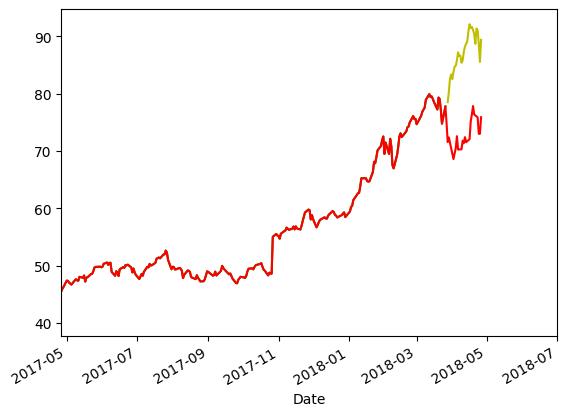

In [183]:
import datetime

dates = pd.date_range(start="2018-03-28", end="2018-04-26")

plt.plot(dates, forecast_predicted, color="y")
df["Adj Close"].plot(color="g")
df_unmod["Adj Close"].plot(color="r")


plt.xlim(xmin= datetime.date(2017,4,26))
plt.xlim(xmax= datetime.date(2018,7,1))

In [195]:
print(forecast_predicted)
real_stats = df_unmod["Adj Close"].tail(30)
df_unmod["Adj Close"].tail(30)

[78.52284773 80.33629322 82.67940069 83.36617458 82.52807149 83.78876327
 84.72305913 84.87823369 85.81830248 87.22584209 86.5865139  86.61665059
 85.39828715 85.83432971 87.33227937 88.23195718 88.70390937 89.14380708
 90.87709683 92.12752452 91.4728051  91.65364476 91.0970359  90.41475316
 88.69941822 91.36572203 91.067545   88.69878222 85.53358911 89.40030155]


Date
2018-03-15    79.115997
2018-03-16    78.584000
2018-03-19    77.246498
2018-03-20    79.325500
2018-03-21    79.093002
2018-03-22    77.246002
2018-03-23    74.778000
2018-03-26    77.792999
2018-03-27    74.852501
2018-03-28    71.570999
2018-03-29    72.366997
2018-04-02    68.599503
2018-04-03    69.602501
2018-04-04    70.528503
2018-04-05    72.587502
2018-04-06    70.261497
2018-04-09    70.304001
2018-04-10    71.810997
2018-04-11    71.352501
2018-04-12    72.425003
2018-04-13    71.539497
2018-04-16    72.074997
2018-04-17    75.191498
2018-04-18    76.391998
2018-04-19    77.845497
2018-04-20    76.374496
2018-04-23    75.892998
2018-04-24    73.004501
2018-04-25    73.008499
2018-04-26    75.898003
Name: Adj Close, dtype: float64

In [205]:
accuracy = []
for i in range(len(forecast_predicted)):
    accuracy.append(forecast_predicted[i] - real_stats[i])
accuracy
mean = Math.mean(accuracy)
mean

NameError: name 'Math' is not defined